In [3]:
from scitiff.data import hyperstack_example
from scitiff.io import  save_scitiff, load_scitiff
import scipp as sc
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Integrated Image')

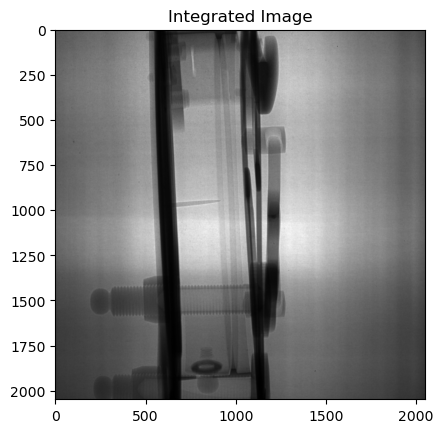

In [17]:
# Create the integrated image
integrated_img = Image.open('integrated_image.tiff')
integrated_img = np.array(integrated_img, dtype=np.float32)

fig, ax = plt.subplots()
ax.imshow(integrated_img, cmap='gray')
ax.set_title('Integrated Image')

In [8]:
# Create the array of the sum of counts of the ROI over the entire TOF range

# create an array of random float of 1000 values between 0 and 1
roi_counts = np.random.rand(1000)

# fig, ax = plt.subplots()
# ax.plot(roi_counts)
# ax.set_title('ROI Counts over TOF Range')

In [13]:
# create the roi defintion
x0 = 100
y0 = 150
width = 50
height = 75

x0_scitiff = sc.scalar(x0)
y0_scitiff = sc.scalar(y0)
width_scitiff = sc.scalar(width)
height_scitiff = sc.scalar(height)


In [ ]:
# Create the Scitiff file with integrated_img, roi_counts, and roi definition as metadata

In [29]:
x = sc.linspace('x', 0, integrated_img.shape[1]-1, integrated_img.shape[1])
y = sc.linspace('y', 0, integrated_img.shape[0]-1, integrated_img.shape[0])
data = sc.array(dims=['y','x'], values=integrated_img)
integrated_data_array = sc.DataArray(data=data, coords={'x': x, 'y': y})
integrated_data_array

<scipp.DataArray>
Dimensions: Sizes[y:2048, x:2048, ]
Coordinates:
* x                         float64  [dimensionless]  (x)  [0, 1, ..., 2046, 2047]
* y                         float64  [dimensionless]  (y)  [0, 1, ..., 2046, 2047]
Data:
                            float32  [dimensionless]  (y, x)  [17775, 18003, ..., 10775, 10766]

In [37]:
tof_range = sc.linspace('tof', 0, 999, 1000)
profile_data_array = sc.array(dims=['tof'], values=roi_counts)
profile_data_array


<scipp.Variable> (tof: 1000)    float64  [dimensionless]  [0.351809, 0.272626, ..., 0.0654579, 0.718185]

In [40]:
integrated_data_array.coords['roi_x0'] = x0_scitiff
integrated_data_array.coords['roi_y0'] = y0_scitiff
integrated_data_array.coords['roi_width'] = width_scitiff
integrated_data_array.coords['roi_height'] = height_scitiff

In [39]:
integrated_data_array

<scipp.DataArray>
Dimensions: Sizes[y:2048, x:2048, ]
Coordinates:
* roi_height                  int64  [dimensionless]  ()  75
* roi_width                   int64  [dimensionless]  ()  50
* roi_x0                      int64  [dimensionless]  ()  100
* roi_y0                      int64  [dimensionless]  ()  150
* x                         float64  [dimensionless]  (x)  [0, 1, ..., 2046, 2047]
* y                         float64  [dimensionless]  (y)  [0, 1, ..., 2046, 2047]
Data:
                            float32  [dimensionless]  (y, x)  [17775, 18003, ..., 10775, 10766]

In [44]:
# I need to put integrated_data_array and profile_data_array into a single scipp dataset
data_group = sc.DataGroup({'integrated_image': integrated_data_array,
                           'roi_profile': profile_data_array})
data_group


DataGroup(sizes={'y': 2048, 'x': 2048, 'tof': 1000}, keys=[
    integrated_image: DataArray({'y': 2048, 'x': 2048}),
    roi_profile: Variable({'tof': 1000}),
])

In [47]:
data_group.get('integrated_image')

<scipp.DataArray>
Dimensions: Sizes[y:2048, x:2048, ]
Coordinates:
* roi_height                  int64  [dimensionless]  ()  75
* roi_width                   int64  [dimensionless]  ()  50
* roi_x0                      int64  [dimensionless]  ()  100
* roi_y0                      int64  [dimensionless]  ()  150
* x                         float64  [dimensionless]  (x)  [0, 1, ..., 2046, 2047]
* y                         float64  [dimensionless]  (y)  [0, 1, ..., 2046, 2047]
Data:
                            float32  [dimensionless]  (y, x)  [17775, 18003, ..., 10775, 10766]

In [51]:
# let's try to save it as a scitiff file
save_scitiff(data_group['integrated_image'], 'scitiff_with_metadata.tiff')

In [ ]:

x0 = sc.scalar(100, unit='mm')
width = sc.scalar(200, unit='mm')
y0 = sc.scalar(100, unit='mm')
height = sc.scalar(100, unit='mm')

# Set ROI mask
# Note that the mask is True for excluded values
maskx = (sample_img.coords['x'] < x0 ) | (sample_img.coords['x'] > x0 + width)
sample_img.masks['mask-roi-x'] = maskx
masky = (sample_img.coords['y'] < y0 ) | (sample_img.coords['y'] > y0 + height)
sample_img.masks['mask-roi-y'] = masky

# Calculate total counts in the ROI
# Mask excluded out of regions
total_roi_counts = sample_img.sum(('x', 'y', 'z', 'c')).data # Only taking the data part
display(total_roi_counts)

# Insert the Coordinates
sample_img.coords['total-count-roi'] = total_roi_counts
sample_img.coords['roi-x0'] = x0
sample_img.coords['roi-width'] = width
sample_img.coords['roi-y0'] = y0
sample_img.coords['roi-height'] = height
display(a)

# Save it to a TIFF file
save_scitiff(sample_img, 'image_with_arbitrary_info.tiff')
# Load it back
loaded_img = load_scitiff('image_with_arbitrary_info.tiff')
display(loaded_img['image'])